### Exercise 1 - Clustering using k-means
Use the IRIS dataset form sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Use[ k_means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) on the dataset. Use this [tutorial](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee) as a reference.

Tasks
1. Select two features that are diffrent from the tutorial (e.g. Petal widgth and Petal length)
2. Plot the graphs of the different classes based on the two selected features. 
3. Decide how many clusters to use and why. It can be done from looking at the plotted graph. 
4. Peform the k-means clustering and plot the graph with two selected features. 
5. Does the k-means clustering do a good job at clustering different classes well.

Add your answers below.



### Exercise 2 - K-Means for vector quantization (compression)
Examine the code below for the usage for k-Means vector quantization. In this example we use k-Means to find 64 colors clusters based on 96,000 color values used in the picture. And then we represent the image using only 64 colors. Compare the performance of randomly selected colors vs k-means and see which one preserves the original picture better. 
Tasks 
1. Use a different image (flower.jpg)
2. Use differnt number of compressed colors. 

Automatically created module for IPython interactive environment
Fitting model on a small sub-sample of the data
done in 0.265s.
Predicting color indices on the full image (k-means)
done in 0.216s.
Predicting color indices on the full image (random)
done in 0.213s.


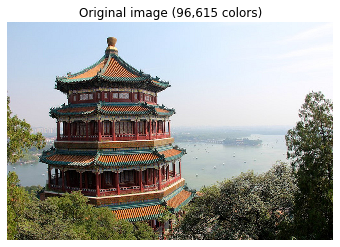

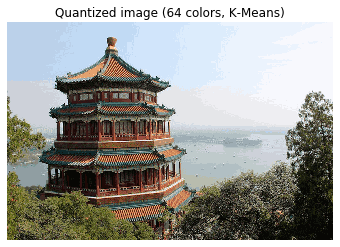

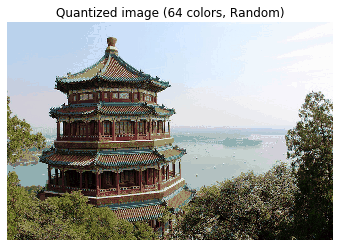

In [3]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

### Exercise 3 - Clustering using DBSCAN
Using the same dataset with same features and the same plots as in exercise 1, use [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to cluter instead of k-means clustering.

Tasks
1. Use DBScan to cluster the dataset. Try different values of min_samples and eps.
2. Plot the graph with two selected features and DBScan cluster. 
3. How does DBSCAN performs in comparison to k-means.

Add your answers below.

